In [1]:
import graph
import networkx as nx

# 1 Introduction

The notebook utilize Ana Rodriguez as a starting point to iteratively construct a network of environmental influence within Florida. Subsequently, the network is visualized and analyzed for further insights.

## 1.1 Assumptions
- Five type of nodes: Policy, Politician, Committee, Donor, Interest Group.
    - The policies (bills) are all environment-related in recent years.
- Five type of edges (relations): Vote, Sponsor, Concensus, Donate, Rate.
- The graph is weighted and directed.
    - The weights of Donate edges and Rate edges are normalized to between 0 and 1 using min-max scaling, respectively. 
    - The weight of concensus is set to 1 if the two politicians who support the the same policy belong to the same party; otherwise, it is set to 0.5.
    - The default weight for other edges is 1.

## 1.2 Analysis Objectives
- Structural evolution in the process of graph construction.
    - Refer to [graph_construct_diagrams](graph_construct_diagrams) folder for details.
- Influence study using centrality metrics
    - Degree centrality: measures the number of edges connected to a node. It is defined as the number of edges connected to a node divided by the maximum possible edges that the node could have.
    - Betweenness centrality: measures the number of times a node acts as a bridge along the shortest path between two other nodes. It is defined as the number of shortest paths going through a node divided by the total number of shortest paths.
    - Closeness centrality: measures how easily a node in a network can access all other nodes in the network. It is calculated as the inverse of the average shortest path length from the node to all other nodes in the network. Nodes with high closeness centrality are able to access other nodes more efficiently than nodes with low closeness centrality. 
    - PageRank centrality: computes a ranking of the nodes in the graph based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.
- Sensitivity analysis
- Community detection


# 2 Graph Construction

## 2.1 First Iteration
- Scrape the environment bills for which Ana Rodriguez votes yes since 2021, create the corresponding nodes and edges.
- Scrape her campagin donors, create the corresponding nodes and edges (donation amount >= 2000).
- Scrape the interest groups that endorse her, create the corresponding nodes and edges (rating >= 60).

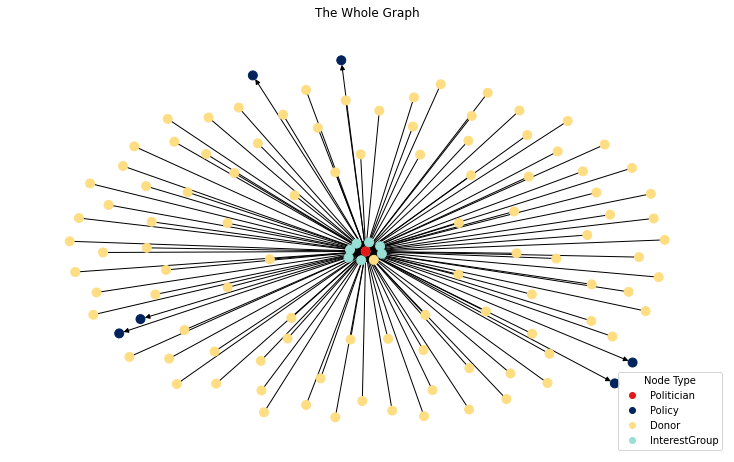

In [2]:
name='Ana Rodriguez'
state='FL'

directory = 'processed_data/FL/first_iter'
all_nodes, all_edges = graph.read_pkl(directory)
# create empty directed graph
DiG = nx.DiGraph()
# define a color map for different node types
color_map={'Politician':'#E21818', 'Policy':'#00235B', 'Donor':'#FFDD83', 'InterestGroup':'#98DFD6'}
graph.draw_whole_graph(DiG, all_nodes, all_edges, color_map)

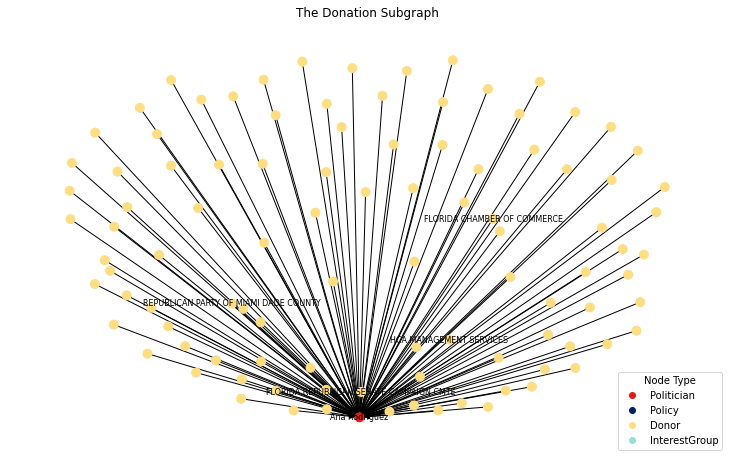

In [3]:
graph.draw_donation_graph(DiG, color_map)

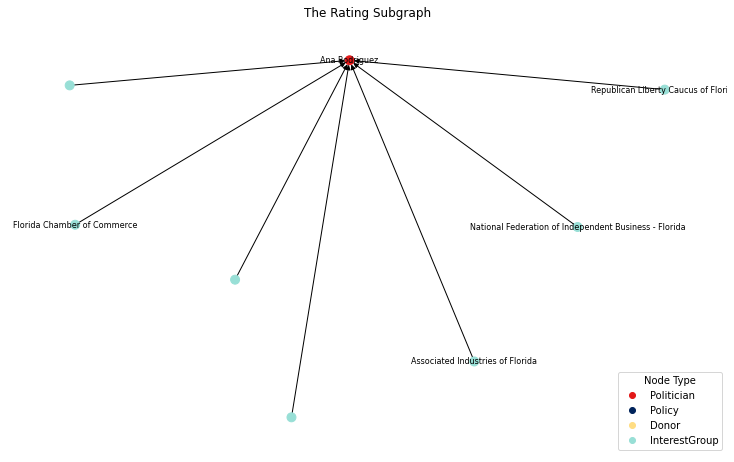

In [4]:
graph.draw_rating_graph(DiG, color_map)

In [5]:
dc1, bc1, cc1, pc1 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Ana Rodriguez (FL) Network

Degree Centrality
-----------------
Ana Rodriguez: 1.0
FLORIDA REPUBLICAN SENATE CAMPAIGN CMTE: 0.008849557522123894
REPUBLICAN PARTY OF MIAMI DADE COUNTY: 0.008849557522123894
HCA MANAGEMENT SERVICES: 0.008849557522123894
FLORIDA CHAMBER OF COMMERCE: 0.008849557522123894
GEO GROUP: 0.008849557522123894
WALT DISNEY: 0.008849557522123894
FLORIDA PBA: 0.008849557522123894
FLORIDA CPA INC-GENERAL: 0.008849557522123894
FLORIDA HOSPITAL ASSOCIATION: 0.008849557522123894

Betweenness Centrality
----------------------
Ana Rodriguez: 0.05072692793931732
FLORIDA REPUBLICAN SENATE CAMPAIGN CMTE: 0.0
REPUBLICAN PARTY OF MIAMI DADE COUNTY: 0.0
HCA MANAGEMENT SERVICES: 0.0
FLORIDA CHAMBER OF COMMERCE: 0.0
GEO GROUP: 0.0
WALT DISNEY: 0.0
FLORIDA PBA: 0.0
FLORIDA CPA INC-GENERAL: 0.0
FLORIDA HOSPITAL ASSOCIATION: 0.0

Closeness Centrality
--------------------
Ana Rodriguez: 0.9469026548672567
HB 9-B: 0.48009878575838655
SB 4-A: 0.48009878575838655

## 2.2 Second Iteration
- Scrape the second depth politicians/committees who are the sponsors of the environment bills for which Ana Rodriguez votes yes since 2021.
- Create the edges between the second depth politicians/committees and the bills they sponsor.
- Create the edges between the second depth politicians who sponsor the same bill.

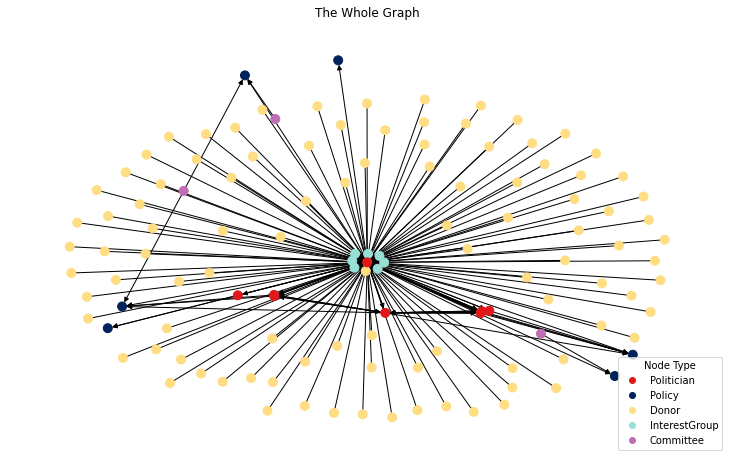

In [6]:
directory = 'processed_data/FL/second_iter'
new_nodes, new_edges = graph.read_pkl(directory)
# update the color map to include new node_type
color_map['Committee'] = '#BE6DB7'
graph.draw_whole_graph(DiG, new_nodes, new_edges, color_map)

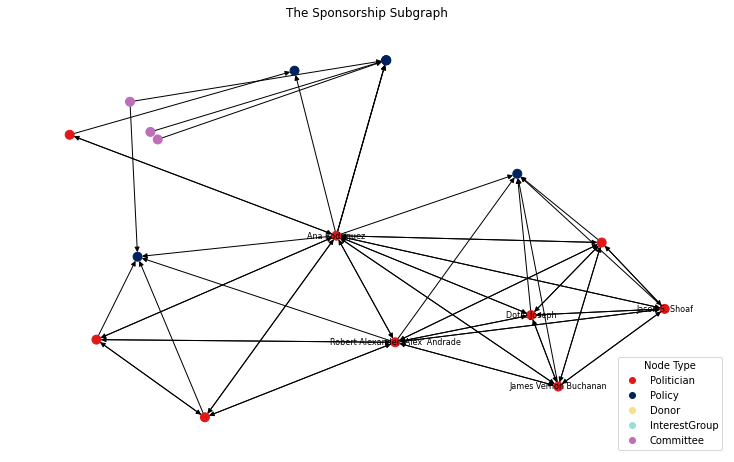

In [7]:
graph.draw_sponsorship_graph(DiG, color_map)

In [8]:
dc2, bc2, cc2, pc2 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Ana Rodriguez (FL) Network

Degree Centrality
-----------------
Ana Rodriguez: 1.0403225806451613
Robert Alexander 'Alex' Andrade: 0.12903225806451613
James Vernon Buchanan: 0.08870967741935484
Dotie Joseph: 0.08870967741935484
Jason S. Shoaf: 0.08870967741935484
Dana Trabulsy: 0.08870967741935484
Carolina Amesty: 0.056451612903225805
Fred Hawkins Jr.: 0.056451612903225805
HB 741: 0.04838709677419355
HB 9-B: 0.04032258064516129

Betweenness Centrality
----------------------
Ana Rodriguez: 0.1020194072908471
Robert Alexander 'Alex' Andrade: 0.0007212168895882507
FLORIDA REPUBLICAN SENATE CAMPAIGN CMTE: 0.0
REPUBLICAN PARTY OF MIAMI DADE COUNTY: 0.0
HCA MANAGEMENT SERVICES: 0.0
FLORIDA CHAMBER OF COMMERCE: 0.0
GEO GROUP: 0.0
WALT DISNEY: 0.0
FLORIDA PBA: 0.0
FLORIDA CPA INC-GENERAL: 0.0

Closeness Centrality
--------------------
Ana Rodriguez: 0.9274193548387096
HB 9-B: 0.48207494013241303
HB 771: 0.4819327149383913
HB 741: 0.4801598629745932
Robert Alexander 'A

## 2.3 Third Iteration
- Scrape the campagin donors for each second depth politician, create the corresponding nodes and edges (donation amount >= 2000).

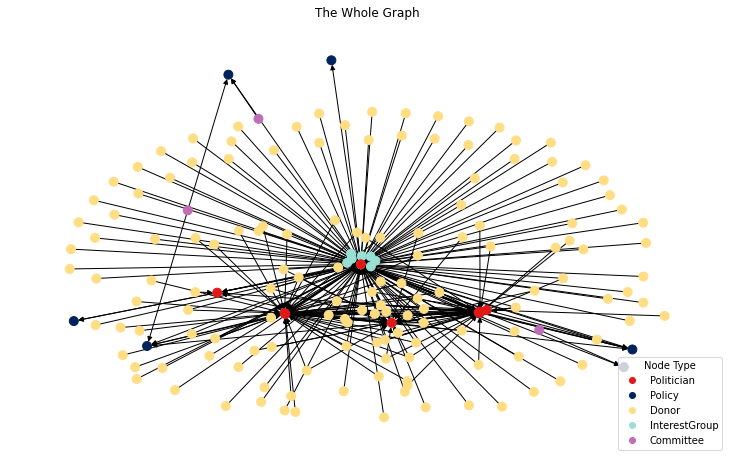

In [9]:
directory = 'processed_data/FL/third_iter'
new_nodes, new_edges = graph.read_pkl(directory)
graph.draw_whole_graph(DiG, new_nodes, new_edges, color_map)

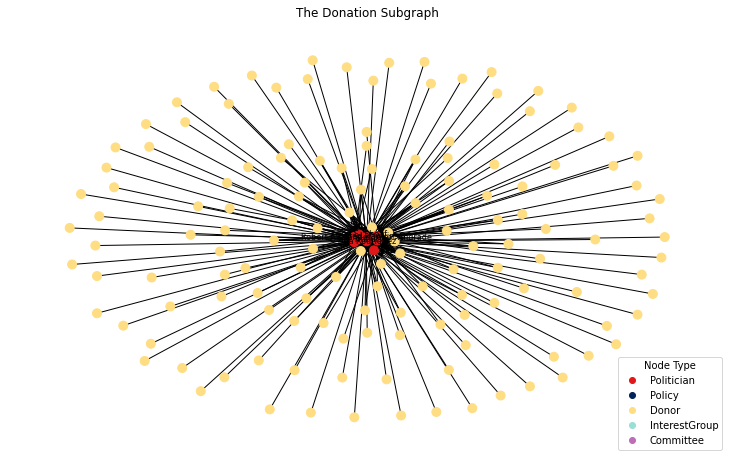

In [10]:
graph.draw_donation_graph(DiG, color_map)

In [11]:
dc3, bc3, cc3, pc3 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Ana Rodriguez (FL) Network

Degree Centrality
-----------------
Ana Rodriguez: 0.7724550898203594
Fred Hawkins Jr.: 0.28742514970059885
Robert Alexander 'Alex' Andrade: 0.2095808383233533
Dana Trabulsy: 0.2035928143712575
Jason S. Shoaf: 0.10778443113772455
Dotie Joseph: 0.08982035928143713
Carolina Amesty: 0.08383233532934133
James Vernon Buchanan: 0.08383233532934133
HCA MANAGEMENT SERVICES: 0.05389221556886228
Travis J. Hutson: 0.04191616766467066

Betweenness Centrality
----------------------
Ana Rodriguez: 0.06230370584132939
Fred Hawkins Jr.: 0.00974977755332708
Robert Alexander 'Alex' Andrade: 0.0073581752158333935
Dana Trabulsy: 0.004765168458264194
Carolina Amesty: 0.001890796719813385
Dotie Joseph: 0.0010412909121516004
Travis J. Hutson: 0.0005591227184185845
Jason S. Shoaf: 0.00046052473366519963
James Vernon Buchanan: 6.853762354808454e-05
FLORIDA REPUBLICAN SENATE CAMPAIGN CMTE: 0.0

Closeness Centrality
--------------------
Ana Rodriguez: 0.74370

## 2.4 Fourth Iteration
- Scrape the interest groups that endorse each second depth politician, create the corresponding nodes and edges (rating >= 60).

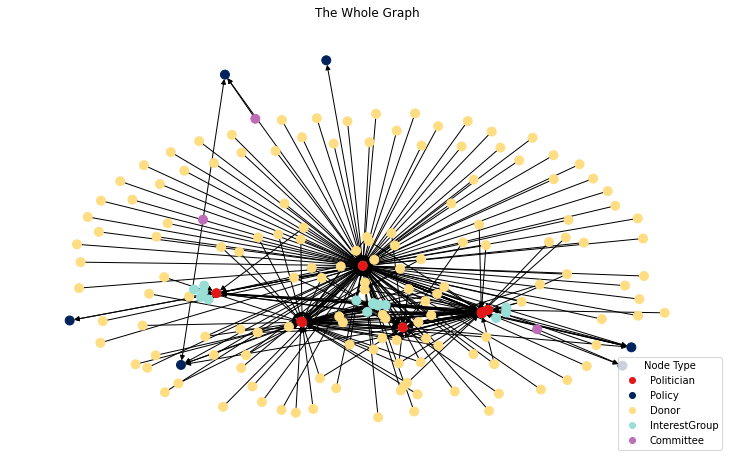

In [12]:
directory = 'processed_data/FL/fourth_iter'
new_nodes, new_edges = graph.read_pkl(directory)
graph.draw_whole_graph(DiG, new_nodes, new_edges, color_map)

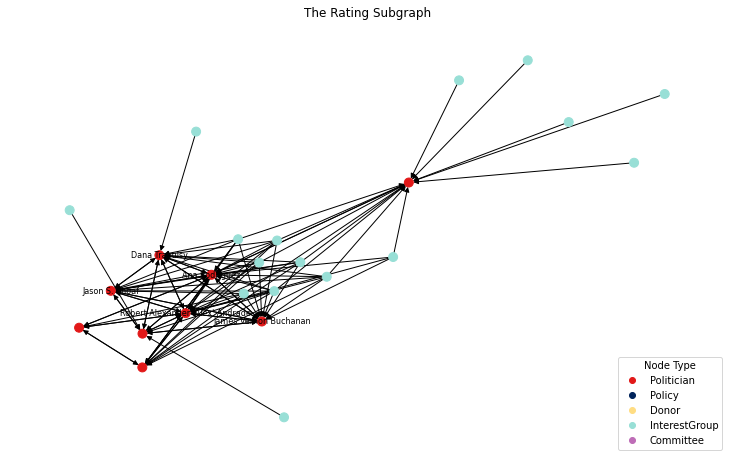

In [13]:
graph.draw_rating_graph(DiG, color_map)

In [14]:
dc4, bc4, cc4, pc4 = graph.centrality(DiG, politician_name=name, state=state, top_n=10)

Centrality Metrics of the Ana Rodriguez (FL) Network

Degree Centrality
-----------------
Ana Rodriguez: 0.7329545454545455
Fred Hawkins Jr.: 0.3125
Robert Alexander 'Alex' Andrade: 0.24431818181818182
Dana Trabulsy: 0.23295454545454547
Jason S. Shoaf: 0.14204545454545456
James Vernon Buchanan: 0.125
Travis J. Hutson: 0.11363636363636365
Dotie Joseph: 0.10227272727272728
Carolina Amesty: 0.08522727272727273
HCA MANAGEMENT SERVICES: 0.05113636363636364

Betweenness Centrality
----------------------
Ana Rodriguez: 0.056661796536796524
Fred Hawkins Jr.: 0.008937770562770562
Robert Alexander 'Alex' Andrade: 0.007126082251082251
Dana Trabulsy: 0.004813852813852814
Travis J. Hutson: 0.0029437229437229437
Dotie Joseph: 0.0018517316017316017
Carolina Amesty: 0.0017343073593073593
Jason S. Shoaf: 0.0005389610389610391
James Vernon Buchanan: 0.00022943722943722947
FLORIDA REPUBLICAN SENATE CAMPAIGN CMTE: 0.0

Closeness Centrality
--------------------
Ana Rodriguez: 0.7235626816106269
Fred Hawkin

# 3 Power Law
- Power law is a type of distribution that is commonly observed in real-world networks, including social networks. Since the construction of our network is based on subjective choices, it can be challenging to ensure that the network accurately reflects the characteristics of a real social network. By analyzing the degree distribution of the network and fitting it to a power law, we can assess how representative the constructed network is of a real social network.
- The figure shows that our network follows the power law, meaning that most nodes have a relatively small degree (fewer edges), while only a few nodes have a large degree. However, the network of FL has a discontinuity, where some degrees have no corresponding nodes. 
- Notably, the tail of the degree distribution contains mostly politicians with high degrees, appearing more frequently than expected under a power law distribution. This suggests that our assumption when constructing the network, which links politicians who support the same bill and assumes they must be related, may have overestimated the actual situation.

Calculating best minimal value for power law fit


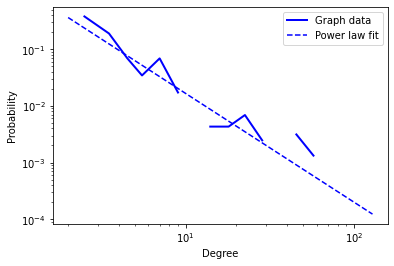

In [15]:
graph.plot_power_law(DiG)

# 4 Sensitivity Analysis
- Use the first iteration as the benchmark; use the Jaccard Similarity Index to measure the similarity of different iterative processes and the benchmark.
- Due to local computing power limitations, it is not feasible to calculate sensitivity analysis with each new node added. Instead, nodes of the same type are added for each iteration, allowing for sensitivity analysis to be performed on an iterative basis. 
- It is worth noting that some metrics become stable from the second iteration, while others become stable from the third. This suggests that structural changes in the graph have varying effects on different metrics.

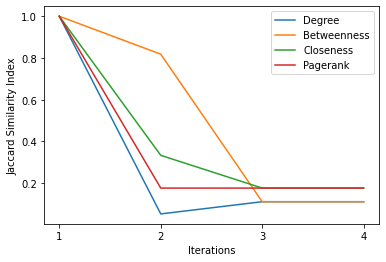

In [16]:
y1 = graph.calculate_y(dc1, dc2, dc3, dc4)
y2 = graph.calculate_y(bc1, bc2, bc3, bc4)
y3 = graph.calculate_y(cc1, cc2, cc3, cc4)
y4 = graph.calculate_y(pc1, pc2, pc3, pc4)

y_lst = [y1, y2, y3, y4]
x = [1, 2, 3, 4]

graph.plot_sensitivity(x, y_lst)

# 5 Centality Metrics Comparison
- Use the fourth iteration network as the basis for the comparison
- Compare the ranking of the top-10 nodes obtained from the different centrality metrics through Jaccard Similarity Index heatmaps.
- The heatmaps will display a value for each pair of centrality metrics, with a higher index indicating a more similar ranking of nodes.

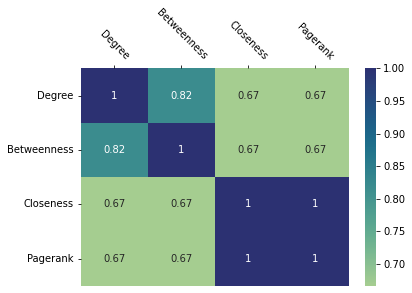

In [17]:
metrics = {'Degree':set(dc4), 'Betweenness':set(bc4), 'Closeness':set(cc4), 'Pagerank':set(pc4)}
jaccard_mat = graph.jaccard_sim(list(metrics.values()))
graph.plot_heatmap(jaccard_mat, list(metrics.keys()))

# 6 Community Detection 
- Analyze on the fourth iteration network.
- Apply Louvain Community Detection Algorithm to identify communities of nodes that share similar characteristics. 
- While most nodes of the same type were in the same community, some exceptions were found. For example, if a community had a mix of individual politicians and interest groups, it might indicate underlying connections or relationships.

In [18]:
graph.community_detection(DiG)

Community 0: ['FLORIDA REPUBLICAN SENATE CAMPAIGN CMTE', 'REPUBLICAN PARTY OF MIAMI DADE COUNTY', 'FLORIDA CHAMBER OF COMMERCE', 'GEO GROUP', 'FLORIDA HOSPITAL ASSOCIATION', 'FLORIDA SOCIETY OF ANESTHESIOLOGISTS', 'SOUTH FLORIDA AUTOMOBILE DEALERS ASSOCIATION', 'FLORIDA BEER WHOLESALERS ASSOCIATION', 'FLORIDA OPTOMETRIC ASSOCIATION', 'FLORIDA EAST COAST INDUSTRIES', 'SOUTHEAST FLORIDA CHAMBER OF COMMERCE', 'VITAL MD FLORIDA', 'CONSERVATIVES UNITED FUND', 'CONSERVATIVES FOR A BETTER FLORIDA', 'A DUDA & SONS', 'ABBOTT LABORATORIES', 'CENTENE CORP', 'DOSAL TOBACCO', 'MARATHON PETROLEUM', 'MERCK & CO', 'PEPSICO', 'SUNSHINE GASOLINE DISTRIBUTORS', 'FLORIDA BANKERS ASSOCIATION', 'FLORIDA CHIROPRACTIC ASSOCIATION', 'FLORIDA CONCRETE & PRODUCTS ASSOCIATIONS', 'FLORIDA CREDIT UNION LEAGUE', 'FLORIDA STATE PILOTS ASSOCIATION', 'FLORIDA HOME BUILDERS ASSOCIATION', 'JPMORGAN CHASE HOLDINGS', 'FLORIDA TRANSPORTATION BUILDERS ASSOCIATION', 'FIORENTINO GROUP', 'AGRO-INDUSTRIAL MANAGEMENT', 'CHARTER S

In [19]:
# graph.save_node_neighbors(DiG, node_type='Donor', path='processed_data/FL_Donor_breakdown.csv')
# graph.save_node_neighbors(DiG, node_type='InterestGroup', path='processed_data/FL_InterestGroup_breakdown.csv')